In [1]:
# 
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np

In [2]:
train_data = pd.read_csv('admission_kl_train.csv')
test_data = pd.read_csv('admission_kl_test.csv')

train_data = train_data [["nox","so2","o3","pm10","admission"]]

test_data = test_data [["nox","so2","o3","pm10","admission"]]



In [3]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
headers = train_data.columns.values.tolist()

for i in headers:
    x = np.array(train_data[i]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(x)
    X_scaled = scaler.transform(x)
    train_data[i] = X_scaled.reshape(1,-1)[0]
    
for i in headers:
    x = np.array(test_data[i]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(x)
    X_scaled = scaler.transform(x)
    test_data[i] = X_scaled.reshape(1,-1)[0]

print(train_data.info)
print(test_data.info)



<bound method DataFrame.info of             nox       so2        o3      pm10  admission
0      0.277778  0.055556  0.494949  0.068847   0.130435
1      0.305556  0.055556  0.247475  0.065404   0.217391
2      0.333333  0.055556  0.207071  0.053356   0.043478
3      0.416667  0.083333  0.222222  0.077453   0.043478
4      0.250000  0.083333  0.196970  0.067126   0.086957
...         ...       ...       ...       ...        ...
43267  0.194444  0.000000  0.035354  0.082616   0.086957
43268  0.138889  0.000000  0.080808  0.086059   0.086957
43269  0.111111  0.000000  0.050505  0.082616   0.086957
43270  0.138889  0.000000  0.045455  0.099828   0.173913
43271  0.166667  0.000000  0.040404  0.103270   0.173913

[43272 rows x 5 columns]>
<bound method DataFrame.info of             nox       so2        o3      pm10  admission
0      0.210526  0.037037  0.313609  0.053782   0.038462
1      0.368421  0.074074  0.562130  0.065546   0.038462
2      0.236842  0.074074  0.224852  0.052101   0.0769

In [4]:
x_train = train_data.drop(['admission'], axis=1).values
y_train = train_data['admission'].values

x_test = test_data.drop(['admission'], axis=1).values
y_test = test_data['admission'].values

In [5]:
model = Sequential()
model.add(Dense(14, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



In [20]:
import keras
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = optimizer, metrics = ['accuracy'])

In [21]:

history = model.fit(x_train, y_train, epochs=200, batch_size=16,validation_split = 0.2, verbose = 0)

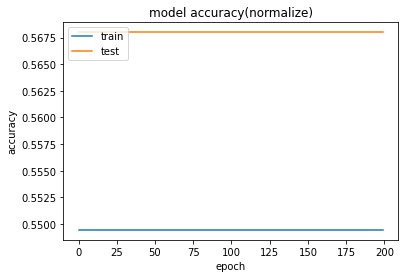

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy(normalize)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

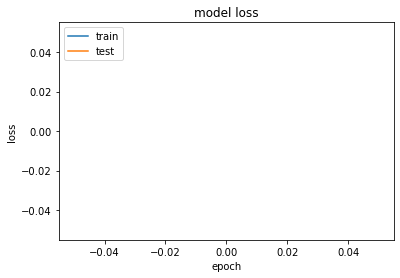

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# evaluate the model(normalize)
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(x_test, y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))

Train: 0.553, Test: 0.547


In [25]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(x_test).ravel()
y_pred

580/580 [==============================] - 2s 3ms/step


array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [26]:
prediction = [1 - x for x in y_pred]
prediction = np.array(prediction)
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, prediction)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras

ValueError: continuous format is not supported

# Tuning